In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [124]:
#Compute sorted pair (i, j), sorted by i^2 + j^2
#wInt64h i≥0 and j≥0 and i+j>0
#These pairs are used for Karhunen–Loève expansion

def compute_seq_pairs(N_KL, include_00 = False):
    trunc_Nx = int(np.floor(np.sqrt(2*N_KL)) + 1)

    seq_pairs = np.zeros(((trunc_Nx+1)**2 - 1 + include_00, 3))

    seq_pairs_i = 0

    for i in range(trunc_Nx):
        for j in range(trunc_Nx):
            if (i == 0 & j ==0 & (not include_00)):
                continue
            seq_pairs[seq_pairs_i, :] = [i, j, i**2 + j**2]
            seq_pairs_i += 1

    seq_pairs = seq_pairs[:N_KL,:]
    seq_pairs = seq_pairs[seq_pairs[:, -1].argsort()] 

    return seq_pairs[:,:-1]

In [213]:
N_data = 1
N_KL = 200
seq_pairs = compute_seq_pairs(N_KL)

N = 100
xgrid = np.linspace(0,1,N+1)
Y, X = np.meshgrid(xgrid, xgrid)

In [214]:
def c_func_random(x1, x2,seq_pairs,tao = 3, d = 2):

    N_KL = seq_pairs.shape[0]
    theta = np.random.normal(0,1,N_KL)

    a = np.zeros_like(x1)

    for i in range(N_KL):

        λ = ((np.pi**2)*(seq_pairs[i, 0]**2 + seq_pairs[i, 1]**2) + tao**2)**(-d)
        
        if ((seq_pairs[i, 0] == 0) & (seq_pairs[i, 1] == 0)):
            a += theta[i] * np.sqrt(λ)
        elif (seq_pairs[i, 0] == 0):
            a += theta[i] * np.sqrt(λ) * np.sqrt(2)*np.cos(np.pi * (seq_pairs[i, 1]*x2))
        elif (seq_pairs[i, 1] == 0):
            a += theta[i] * np.sqrt(λ) * np.sqrt(2)*np.cos(np.pi * (seq_pairs[i, 0]*x1))
        else:
            a += theta[i] * np.sqrt(λ) * 2*np.cos(np.pi * (seq_pairs[i, 0]*x1)) *  np.cos(np.pi * (seq_pairs[i, 1]*x2))

    return a

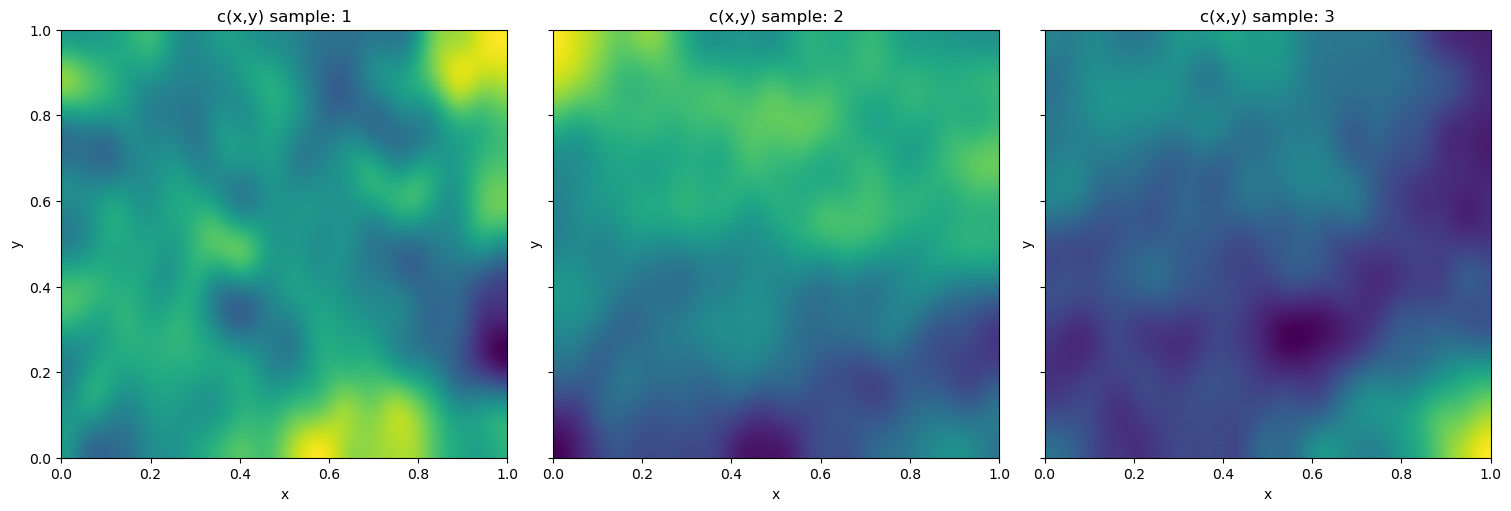

In [224]:
_, axs = plt.subplots(1,3,figsize = (15,5), layout='constrained', sharey=True)

for i in range(3):
    c = c_func_random(Y,X,seq_pairs)
    axs[i].pcolormesh(X, Y, c, shading="gouraud")
    axs[i].set_xlabel("x"), axs[i].set_ylabel("y"), axs[i].set_title(f"c(x,y) sample: {i+1}")
